In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,Rob,27,7000
1,Micheal,29,9000
2,Mohan,29,61000
3,Ismail,28,6000
4,Kory,42,15000


Text(0, 0.5, 'Income')

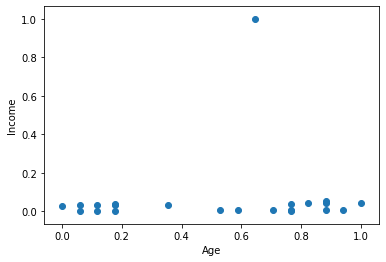

In [25]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2],
      dtype=int32)

In [8]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,7000,0
1,Micheal,29,9000,0
2,Mohan,29,61000,2
3,Ismail,28,6000,0
4,Kory,42,15000,0


No handles with labels found to put in legend.


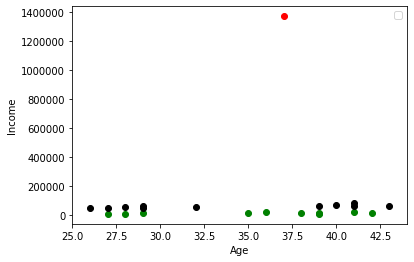

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [14]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.000733,0
1,Micheal,0.176471,0.002199,0
2,Mohan,0.176471,0.040323,2
3,Ismail,0.117647,0.000000,0
4,Kory,0.941176,0.006598,0


In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [17]:
df['cluster'] = y_predicted


In [18]:
km.cluster_centers_

array([[0.79411765, 0.02194526],
       [0.1372549 , 0.02244216],
       [0.64705882, 1.        ]])

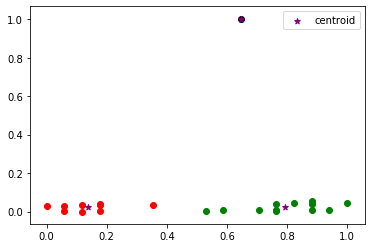

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow plot

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

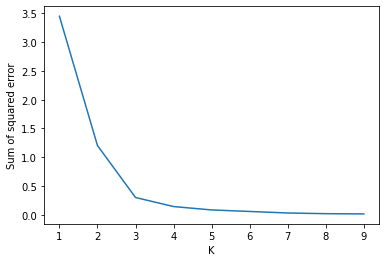

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)